# 11. Splitting data 

Often one has tables that mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data by categories or *groups* to do computations. Pandas allows to do this very easily. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11.1 Grouping

Let's import some data and have a look at them:

In [2]:
composers = pd.read_excel('Data/composers.xlsx', sheet_name='Sheet5')

In [3]:
composers.head()

,composer,birth,death,period,country
0,Mahler,1860,1911.0,post-romantic,Austria
1,Beethoven,1770,1827.0,romantic,Germany
2,Puccini,1858,1924.0,post-romantic,Italy
3,Shostakovich,1906,1975.0,modern,Russia
4,Verdi,1813,1901.0,romantic,Italy


We also add a column here to calculate the composers' age:

In [4]:
composers['age'] = composers.death - composers.birth

### 11.1.1 Single level 
What if we want now to count how many composers we have in a certain category like the period or country? In classical computing we would maybe do a for loop to count occurrences. Pandas simplifies this with the ```groupby()``` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [5]:
composer_grouped = composers.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called a group which has a lot of handy properties. First let's see what the groups actually are. We can find all groups with ```groups```:

In [6]:
composer_grouped.groups

{'baroque': [14, 16, 17, 20, 21, 28, 29, 30, 31, 47], 'classic': [9, 10, 32, 40, 51], 'modern': [3, 7, 11, 12, 19, 25, 45, 46, 50, 53, 54, 55, 56], 'post-romantic': [0, 2, 8, 18, 49], 'renaissance': [13, 26, 27, 36, 37, 43, 44], 'romantic': [1, 4, 5, 6, 15, 22, 23, 24, 33, 34, 35, 38, 39, 41, 42, 48, 52]}

We have a dictionary, where each *period* that appears in the Dataframe is a key and each key contains a list of dataframe *indices* of rows with those periods. We will rarely directly use those indices, as most operations on groups only use those "behind the scene".

For example we can use ```describe()``` on a group object, just like we did it before for a Dataframe:

In [7]:
composer_grouped.describe()#.loc['Austria','birth']

birth                                                          \
              count         mean        std     min     25%     50%     75%   
period                                                                        
baroque        10.0  1663.300000  36.009412  1587.0  1647.0  1676.5  1685.0   
classic         5.0  1744.400000  12.054045  1731.0  1732.0  1749.0  1754.0   
modern         13.0  1905.692308  28.595992  1854.0  1891.0  1902.0  1918.0   
post-romantic   5.0  1854.200000  17.123084  1824.0  1858.0  1860.0  1864.0   
renaissance     7.0  1527.142857  59.881629  1397.0  1528.5  1540.0  1564.5   
romantic       17.0  1824.823529  25.468695  1770.0  1810.0  1824.0  1841.0   

                      death               ...                    age  \
                  max count         mean  ...      75%     max count   
period                                    ...                          
baroque        1710.0  10.0  1720.200000  ...  1755.25  1764.0  10.0   
classic        1756.0   5.0  1801.200000  ...  1806.00  1809.0   5.0   
modern         1971.0  11.0  1974.090909  ...  1990.00  2016.0  11.0   
post-romantic  1865.0   5.0  1927.400000  ...  1949.00  1957.0   5.0   
renaissance    1567.0   7.0  1595.285714  ...  1624.50  1643.0   7.0   
romantic       1867.0  17.0  1883.588235  ...  1904.00  1919.0  17.0   

                                                                    
                    mean        std   min    25%   50%   75%   max  
period                                                              
baroque        56.900000  18.716897  26.0  40.25  63.0  70.5  81.0  
classic        56.800000  16.238842  35.0  52.00  52.0  68.0  77.0  
modern         77.181818  13.136348  50.0  70.50  81.0  88.0  91.0  
post-romantic  73.200000  16.115210  51.0  66.00  72.0  85.0  92.0  
renaissance    68.142857  12.061351  47.0  62.50  69.0  76.5  83.0  
romantic       58.764706  13.250139  34.0  49.00  60.0  66.0  88.0  

[6 rows x 24 columns]

We see here that the statistical analysis has been done for each group, the index of each row being the group name (or key in the dictionary). If we are interested in a specific group we can also easily recover it:

In [8]:
composer_grouped.get_group('classic')

,composer,birth,death,period,country,age
9,Haydn,1732,1809.0,classic,Austria,77.0
10,Mozart,1756,1791.0,classic,Austria,35.0
32,Cimarosa,1749,1801.0,classic,Italy,52.0
40,Soler,1754,1806.0,classic,Spain,52.0
51,Dusek,1731,1799.0,classic,Czechia,68.0


We see that this returns a sub-group from the original table. Effectively it is almost equivalent to:

In [9]:
composers[composers.period == 'classic']

,composer,birth,death,period,country,age
9,Haydn,1732,1809.0,classic,Austria,77.0
10,Mozart,1756,1791.0,classic,Austria,35.0
32,Cimarosa,1749,1801.0,classic,Italy,52.0
40,Soler,1754,1806.0,classic,Spain,52.0
51,Dusek,1731,1799.0,classic,Czechia,68.0


### 11.1.2 Multi-level

If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the ```groupby()``` function:

In [10]:
composer_grouped = composers.groupby(['period','country'])
composer_grouped.describe()

birth                                                   \
                      count         mean        std     min      25%     50%   
period        country                                                          
baroque       England   1.0  1659.000000        NaN  1659.0  1659.00  1659.0   
              France    3.0  1650.666667  29.263174  1626.0  1634.50  1643.0   
              Germany   2.0  1685.000000   0.000000  1685.0  1685.00  1685.0   
              Italy     4.0  1663.000000  53.285395  1587.0  1649.25  1677.5   
classic       Austria   2.0  1744.000000  16.970563  1732.0  1738.00  1744.0   
              Czechia   1.0  1731.000000        NaN  1731.0  1731.00  1731.0   
              Italy     1.0  1749.000000        NaN  1749.0  1749.00  1749.0   
              Spain     1.0  1754.000000        NaN  1754.0  1754.00  1754.0   
modern        Austria   1.0  1885.000000        NaN  1885.0  1885.00  1885.0   
              Czechia   1.0  1854.000000        NaN  1854.0  1854.00  1854.0   
              England   2.0  1936.500000  48.790368  1902.0  1919.25  1936.5   
              France    2.0  1916.500000  12.020815  1908.0  1912.25  1916.5   
              Germany   1.0  1895.000000        NaN  1895.0  1895.00  1895.0   
              RUssia    1.0  1891.000000        NaN  1891.0  1891.00  1891.0   
              Russia    2.0  1894.000000  16.970563  1882.0  1888.00  1894.0   
              USA       3.0  1918.333333  18.502252  1900.0  1909.00  1918.0   
post-romantic Austria   2.0  1842.000000  25.455844  1824.0  1833.00  1842.0   
              Finland   1.0  1865.000000        NaN  1865.0  1865.00  1865.0   
              Germany   1.0  1864.000000        NaN  1864.0  1864.00  1864.0   
              Italy     1.0  1858.000000        NaN  1858.0  1858.00  1858.0   
renaissance   Belgium   2.0  1464.500000  95.459415  1397.0  1430.75  1464.5   
              England   2.0  1551.500000  16.263456  1540.0  1545.75  1551.5   
              Italy     3.0  1552.666667  23.965253  1525.0  1545.50  1566.0   
romantic      Czechia   2.0  1832.500000  12.020815  1824.0  1828.25  1832.5   
              France    3.0  1821.000000  19.672316  1803.0  1810.50  1818.0   
              Germany   4.0  1806.500000  26.388129  1770.0  1800.00  1811.5   
              Italy     4.0  1817.250000  28.004464  1797.0  1800.00  1807.0   
              Russia    2.0  1836.000000   4.242641  1833.0  1834.50  1836.0   
              Spain     2.0  1863.500000   4.949747  1860.0  1861.75  1863.5   

                                       death               ...           \
                           75%     max count         mean  ...      75%   
period        country                                      ...            
baroque       England  1659.00  1659.0   1.0  1695.000000  ...  1695.00   
              France   1663.00  1683.0   3.0  1709.666667  ...  1734.00   
              Germany  1685.00  1685.0   2.0  1754.500000  ...  1756.75   
              Italy    1691.25  1710.0   4.0  1717.250000  ...  1741.25   
classic       Austria  1750.00  1756.0   2.0  1800.000000  ...  1804.50   
              Czechia  1731.00  1731.0   1.0  1799.000000  ...  1799.00   
              Italy    1749.00  1749.0   1.0  1801.000000  ...  1801.00   
              Spain    1754.00  1754.0   1.0  1806.000000  ...  1806.00   
modern        Austria  1885.00  1885.0   1.0  1935.000000  ...  1935.00   
              Czechia  1854.00  1854.0   1.0  1928.000000  ...  1928.00   
              England  1953.75  1971.0   1.0  1983.000000  ...  1983.00   
              France   1920.75  1925.0   2.0  2004.000000  ...  2010.00   
              Germany  1895.00  1895.0   1.0  1982.000000  ...  1982.00   
              RUssia   1891.00  1891.0   1.0  1953.000000  ...  1953.00   
              Russia   1900.00  1906.0   2.0  1973.000000  ...  1974.00   
              USA      1927.50  1937.0   2.0  1990.000000  ...  1990.00   
post-romantic Austria  1851.00  1860

In [18]:
composer_grouped.get_group(('baroque','Germany'))

,composer,birth,death,period,country,age
14,Haendel,1685,1759.0,baroque,Germany,74.0
47,Bach,1685,1750.0,baroque,Germany,65.0


## 11.2 Operations on groups

The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on the operation).

For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us:

In [29]:
# mean() will not work on non-numerical columns, so extracting only numericals
composer_grouped[["birth", "death", "age"]].mean()

birth        death        age
period        country                                     
baroque       England  1659.000000  1695.000000  36.000000
              France   1650.666667  1709.666667  59.000000
              Germany  1685.000000  1754.500000  69.500000
              Italy    1663.000000  1717.250000  54.250000
classic       Austria  1744.000000  1800.000000  56.000000
              Czechia  1731.000000  1799.000000  68.000000
              Italy    1749.000000  1801.000000  52.000000
              Spain    1754.000000  1806.000000  52.000000
modern        Austria  1885.000000  1935.000000  50.000000
              Czechia  1854.000000  1928.000000  74.000000
              England  1936.500000  1983.000000  81.000000
              France   1916.500000  2004.000000  87.500000
              Germany  1895.000000  1982.000000  87.000000
              RUssia   1891.000000  1953.000000  62.000000
              Russia   1894.000000  1973.000000  79.000000
              USA      1918.333333  1990.000000  81.000000
post-romantic Austria  1842.000000  1903.500000  61.500000
              Finland  1865.000000  1957.000000  92.000000
              Germany  1864.000000  1949.000000  85.000000
              Italy    1858.000000  1924.000000  66.000000
renaissance   Belgium  1464.500000  1534.000000  69.500000
              England  1551.500000  1624.500000  73.000000
              Italy    1552.666667  1616.666667  64.000000
romantic      Czechia  1832.500000  1894.000000  61.500000
              France   1821.000000  1891.333333  70.333333
              Germany  1806.500000  1865.750000  59.250000
              Italy    1817.250000  1875.750000  58.500000
              Russia   1836.000000  1884.000000  48.000000
              Spain    1863.500000  1912.500000  49.000000

In [30]:
composer_grouped.count()

composer  birth  death  age
period        country                             
baroque       England         1      1      1    1
              France          3      3      3    3
              Germany         2      2      2    2
              Italy           4      4      4    4
classic       Austria         2      2      2    2
              Czechia         1      1      1    1
              Italy           1      1      1    1
              Spain           1      1      1    1
modern        Austria         1      1      1    1
              Czechia         1      1      1    1
              England         2      2      1    1
              France          2      2      2    2
              Germany         1      1      1    1
              RUssia          1      1      1    1
              Russia          2      2      2    2
              USA             3      3      2    2
post-romantic Austria         2      2      2    2
              Finland         1      1      1    1
              Germany         1      1      1    1
              Italy           1      1      1    1
renaissance   Belgium         2      2      2    2
              England         2      2      2    2
              Italy           3      3      3    3
romantic      Czechia         2      2      2    2
              France          3      3      3    3
              Germany         4      4      4    4
              Italy           4      4      4    4
              Russia          2      2      2    2
              Spain           2      2      2    2

We can also design specific functions (again, like in the case of Dataframes) and apply them on groups:

In [31]:
def mult(myseries):
    return myseries.max() * 3

In [32]:
composer_grouped[["birth", "death", "age"]].apply(mult)

birth   death    age
period        country                       
baroque       England  4977.0  5085.0  108.0
              France   5049.0  5292.0  243.0
              Germany  5055.0  5277.0  222.0
              Italy    5130.0  5271.0  216.0
classic       Austria  5268.0  5427.0  231.0
              Czechia  5193.0  5397.0  204.0
              Italy    5247.0  5403.0  156.0
              Spain    5262.0  5418.0  156.0
modern        Austria  5655.0  5805.0  150.0
              Czechia  5562.0  5784.0  222.0
              England  5913.0  5949.0  243.0
              France   5775.0  6048.0  273.0
              Germany  5685.0  5946.0  261.0
              RUssia   5673.0  5859.0  186.0
              Russia   5718.0  5925.0  267.0
              USA      5811.0  5970.0  270.0
post-romantic Austria  5580.0  5733.0  216.0
              Finland  5595.0  5871.0  276.0
              Germany  5592.0  5847.0  255.0
              Italy    5574.0  5772.0  198.0
renaissance   Belgium  4596.0  4782.0  231.0
              England  4689.0  4878.0  249.0
              Italy    4701.0  4929.0  228.0
romantic      Czechia  5523.0  5712.0  189.0
              France   5526.0  5736.0  225.0
              Germany  5499.0  5691.0  210.0
              Italy    5574.0  5757.0  264.0
              Russia   5517.0  5661.0  162.0
              Spain    5601.0  5748.0  147.0

## 11.3 Reshaping dataframes

As we see above, grouping operations can create more or less complex dataframes by adding one or multiple indexing levels. There are multiple ways to "reshape" such dataframes in order to make thm usable e.g. for plotting. Typically, plotting software based on a grammar of graphics expect a simple 2D dataframe where each line is an observation with several properties.

### 11.3.1 re-indexing, unstacking

One of the most common "reshaping" is to reset the index. In its simplest form, it will create a new dataframe, where each row corresponds to one observation. For example in the case of a dataframe with multi-indices, it will re-cast these indices as columns:

In [42]:

composer_grouped = composers.groupby(['period','country']).count()
composer_grouped
#composer_grouped = composers.groupby(['period','country']).mean()
#composer_grouped.head(10)

composer  birth  death  age
period        country                             
baroque       England         1      1      1    1
              France          3      3      3    3
              Germany         2      2      2    2
              Italy           4      4      4    4
classic       Austria         2      2      2    2
              Czechia         1      1      1    1
              Italy           1      1      1    1
              Spain           1      1      1    1
modern        Austria         1      1      1    1
              Czechia         1      1      1    1
              England         2      2      1    1
              France          2      2      2    2
              Germany         1      1      1    1
              RUssia          1      1      1    1
              Russia          2      2      2    2
              USA             3      3      2    2
post-romantic Austria         2      2      2    2
              Finland         1      1      1    1
              Germany         1      1      1    1
              Italy           1      1      1    1
renaissance   Belgium         2      2      2    2
              England         2      2      2    2
              Italy           3      3      3    3
romantic      Czechia         2      2      2    2
              France          3      3      3    3
              Germany         4      4      4    4
              Italy           4      4      4    4
              Russia          2      2      2    2
              Spain           2      2      2    2

In [43]:
composer_grouped.reset_index().head(5)

,period,country,composer,birth,death,age
0,baroque,England,1,1,1,1
1,baroque,France,3,3,3,3
2,baroque,Germany,2,2,2,2
3,baroque,Italy,4,4,4,4
4,classic,Austria,2,2,2,2


One can of course be more specific and reset only specific indices e.g. by level: 

In [44]:
composer_grouped.reset_index(level=1).head(5)

,country,composer,birth,death,age
period,,,,,
baroque,England,1,1,1,1
baroque,France,3,3,3,3
baroque,Germany,2,2,2,2
baroque,Italy,4,4,4,4
classic,Austria,2,2,2,2


### 11.3.2 unstacking
Another way to move indices to columns is to *unstack* a dataframe, in other words pivot some indices to columns:

In [45]:
composer_grouped.unstack()

composer                                                       \
country        Austria Belgium Czechia England Finland France Germany Italy   
period                                                                        
baroque            NaN     NaN     NaN     1.0     NaN    3.0     2.0   4.0   
classic            2.0     NaN     1.0     NaN     NaN    NaN     NaN   1.0   
modern             1.0     NaN     1.0     2.0     NaN    2.0     1.0   NaN   
post-romantic      2.0     NaN     NaN     NaN     1.0    NaN     1.0   1.0   
renaissance        NaN     2.0     NaN     2.0     NaN    NaN     NaN   3.0   
romantic           NaN     NaN     2.0     NaN     NaN    3.0     4.0   4.0   

                             ...     age                                       \
country       RUssia Russia  ... Czechia England Finland France Germany Italy   
period                       ...                                                
baroque          NaN    NaN  ...     NaN     1.0     NaN    3.0     2.0   4.0   
classic          NaN    NaN  ...     1.0     NaN     NaN    NaN     NaN   1.0   
modern           1.0    2.0  ...     1.0     1.0     NaN    2.0     1.0   NaN   
post-romantic    NaN    NaN  ...     NaN     NaN     1.0    NaN     1.0   1.0   
renaissance      NaN    NaN  ...     NaN     2.0     NaN    NaN     NaN   3.0   
romantic         NaN    2.0  ...     2.0     NaN     NaN    3.0     4.0   4.0   

                                        
country       RUssia Russia Spain  USA  
period                                  
baroque          NaN    NaN   NaN  NaN  
classic          NaN    NaN   1.0  NaN  
modern           1.0    2.0   NaN  2.0  
post-romantic    NaN    NaN   NaN  NaN  
renaissance      NaN    NaN   NaN  NaN  
romantic         NaN    2.0   2.0  NaN  

[6 rows x 48 columns]

This creates a multi-level column indexing. 

### 11.3.3 Wide to long: melt

A very common operation when handling tables is to switch from wide to long format and vice versa. In our composer example, let's for example imagine that you want both ```birth``` and ```death``` dates to be grouped in a single column called ```dates```. But you still need to know if that data is a birth or date, so you need a new column that indicates that. To achieve that, we need to specify ```id_vars``` a list of columns to be used as *identifiers* e.g. the composer name, and ```value_vars```, a list of columns that should become rows: 

In [46]:
composers.head(5)

,composer,birth,death,period,country,age
0,Mahler,1860,1911.0,post-romantic,Austria,51.0
1,Beethoven,1770,1827.0,romantic,Germany,57.0
2,Puccini,1858,1924.0,post-romantic,Italy,66.0
3,Shostakovich,1906,1975.0,modern,Russia,69.0
4,Verdi,1813,1901.0,romantic,Italy,88.0


In [47]:
pd.melt(composers, id_vars=['composer'], value_vars=['birth', 'death'])

,composer,variable,value
0,Mahler,birth,1860.0
1,Beethoven,birth,1770.0
2,Puccini,birth,1858.0
3,Shostakovich,birth,1906.0
4,Verdi,birth,1813.0
...,...,...,...
109,Smetana,death,1884.0
110,Janacek,death,1928.0
111,Copland,death,1990.0
112,Bernstein,death,1990.0


We can keep more of the original columns as *identifiers* and also specify names for the *variable* and *value* columns:

In [48]:
melted = pd.melt(composers, id_vars=['composer','period','age','country'], value_vars=['birth', 'death'],
                var_name = 'date_type', value_name='dates')
melted

,composer,period,age,country,date_type,dates
0,Mahler,post-romantic,51.0,Austria,birth,1860.0
1,Beethoven,romantic,57.0,Germany,birth,1770.0
2,Puccini,post-romantic,66.0,Italy,birth,1858.0
3,Shostakovich,modern,69.0,Russia,birth,1906.0
4,Verdi,romantic,88.0,Italy,birth,1813.0
...,...,...,...,...,...,...
109,Smetana,romantic,60.0,Czechia,death,1884.0
110,Janacek,modern,74.0,Czechia,death,1928.0
111,Copland,modern,90.0,USA,death,1990.0
112,Bernstein,modern,72.0,USA,death,1990.0


## 11.4 Plotting

We have seen above that we can create groups and apply functions to them to get some summary of them as new dataframes or series that could then also be reshaped. The final result of these operations is then ideally suited to be plotted in a very efficient way.

Here's a simple example: we group composers by periods and then calculate the mean age, resulting in a series where periods are indices:

In [49]:
composers.groupby('period')['age'].mean()

period
baroque          56.900000
classic          56.800000
modern           77.181818
post-romantic    73.200000
renaissance      68.142857
romantic         58.764706
Name: age, dtype: float64

We can just add one more operation to that line to create a bar plot illustrating this:

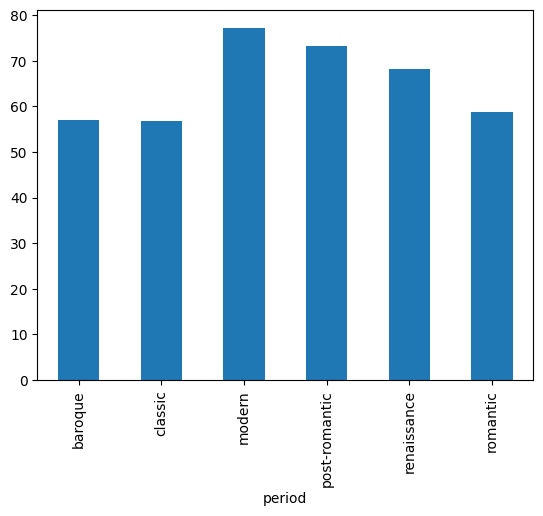

In [50]:
composers.groupby('period')['age'].mean().plot(kind = 'bar');

The built-in plotting capabilities of Pandas automatically used the indices to label the bars, and also used the series name as a general label.

Using more advanced libraries, we can go further than that and use multiple columns to create complex plots. This will be shown in the next chapter.